### Importing libraries, data info and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
df_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

#Function to return the description of specific column name
def feat_info(col_name):
    print(df_info.loc[col_name]['Description'])
    
#Example call
feat_info('home_ownership')

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [3]:
df = pd.read_csv('lending_club_loan_two.csv')

We have some missing data in select columns. First let us check if the data type of each column is correct as per our understanding of the variable

In [4]:
df_type = pd.DataFrame(df.dtypes)
df_info = pd.concat([df_info,df_type],axis=1)
df_info.rename(columns={0: 'data_type'},inplace=True)

In [5]:
df_info

,Description,data_type
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.",float64
term,The number of payments on the loan. Values are in months and can be either 36 or 60.,object
int_rate,Interest Rate on the loan,float64
installment,The monthly payment owed by the borrower if the loan originates.,float64
grade,LC assigned loan grade,object
sub_grade,LC assigned loan subgrade,object
emp_title,The job title supplied by the Borrower when applying for the loan.*,object
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.,object
home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER",object
annual_inc,The self-reported annual income provided by the borrower during registration.,float64


### EDA and Data Cleaning: 

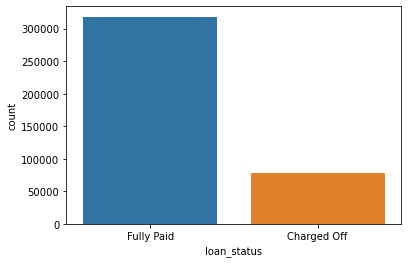

In [6]:
#Distribution of target variable
sns.countplot(x='loan_status',data=df);

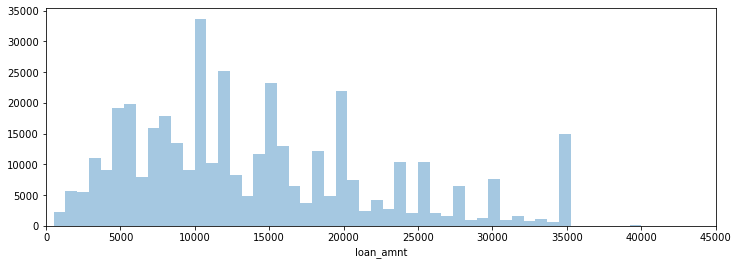

In [7]:
plt.figure(figsize=(12,4))
plt.xlim(0,45000)
sns.distplot(df['loan_amnt'],kde=False);

#### Correlation

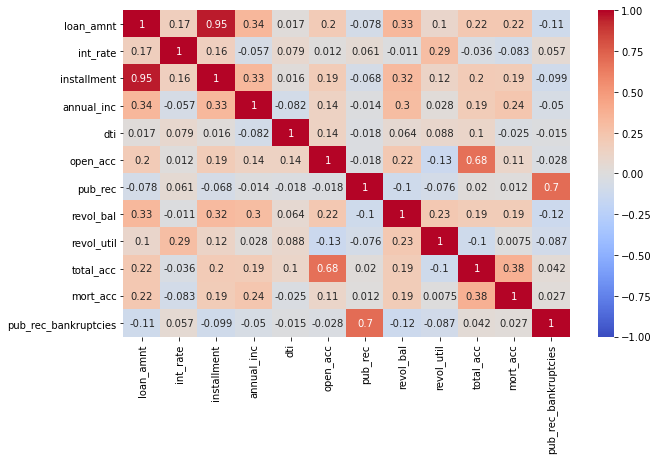

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,vmin=-1,vmax=1);

Key correlations: 
- Loan_amnt is positively correlated with installments i.e. bigger the loan, more is the amount to be paid in monthly installments. Hence, we can remove installments to avoid running into multi-collinearity issues
- Number of derogatory public records and public bankruptices are positively correlated
- If the total number of credit lines are higher then the number of currently open credit lines are also higher

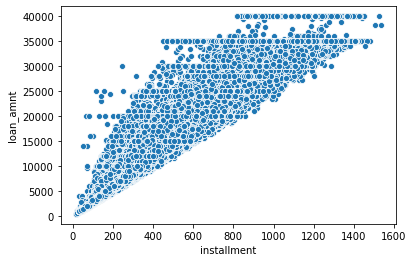

In [9]:
sns.scatterplot(x='installment',y='loan_amnt',data=df);

In [10]:
df.drop('installment',axis=1,inplace=True)

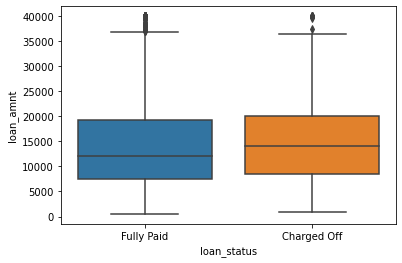

In [11]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df);

There is not much difference between fully paid and charged off loans depending on the actual loan amount 

In [12]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Let us take a look at the grade and subgrade distributions w.r.t. loan status 

In [13]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [14]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

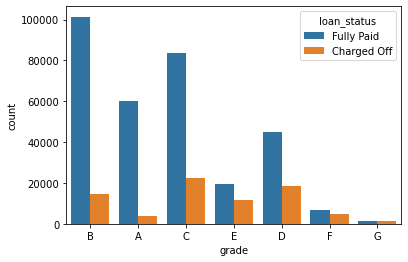

In [15]:
sns.countplot(x='grade',hue='loan_status',data=df);

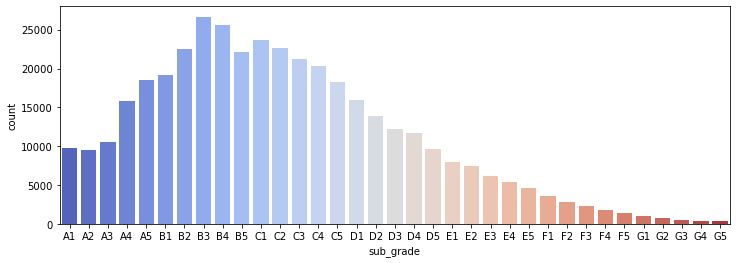

In [16]:
subgrades = list(df['sub_grade'].unique())
subgrades.sort()
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,palette='coolwarm',order=subgrades);

Overall subgrade distribution has a median towards B categories whereas the charged off loans are more common among C subgrades. Whereas for subgrades after E, the charged off and fully paid proportions become almost equal as these are identified as high risk and high value loans

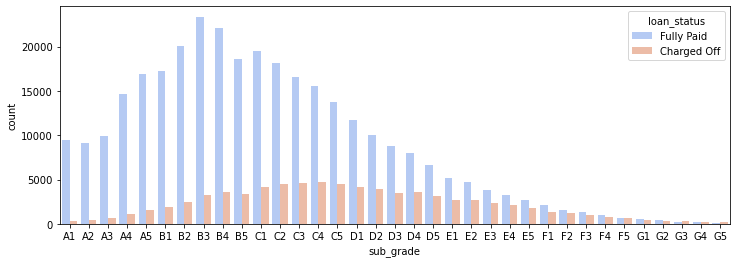

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,palette='coolwarm',order=subgrades,hue='loan_status');

Let us isolate E onwards subgrades to validate our finding i.e. charged off proportion increases here gradually

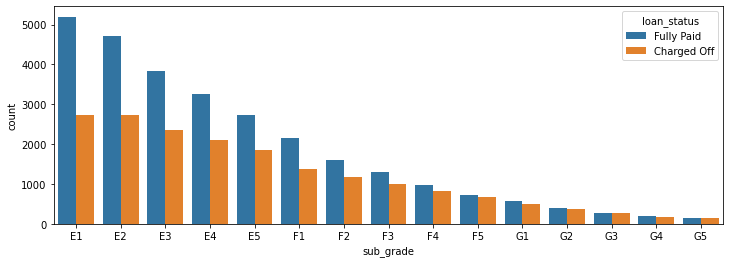

In [18]:
efg_subclass = subgrades[-15:]
efg_df = df[df['sub_grade'].isin(efg_subclass)]
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',hue='loan_status',data=efg_df,order=efg_subclass);

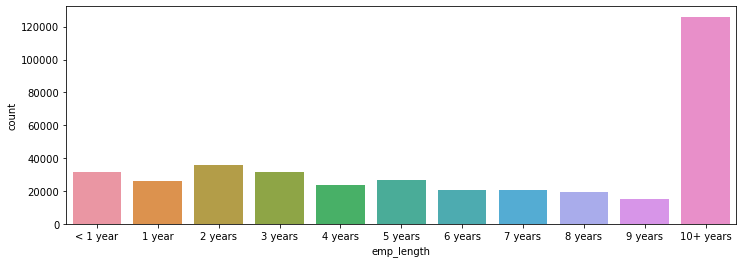

In [19]:
plt.figure(figsize=(12,4))
emp_len = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
sns.countplot(x='emp_length',data=df,order=emp_len);

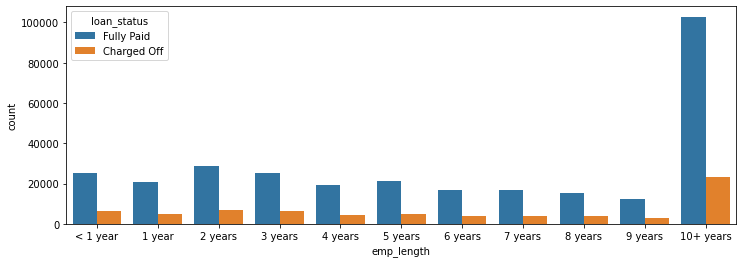

In [20]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_len,hue='loan_status');

#### Handling missing values 

In [21]:
df.isna().sum()

loan_amnt               0    
term                    0    
int_rate                0    
grade                   0    
sub_grade               0    
emp_title               22927
emp_length              18301
home_ownership          0    
annual_inc              0    
verification_status     0    
issue_d                 0    
loan_status             0    
purpose                 0    
title                   1755 
dti                     0    
earliest_cr_line        0    
open_acc                0    
pub_rec                 0    
revol_bal               0    
revol_util              276  
total_acc               0    
initial_list_status     0    
application_type        0    
mort_acc                37795
pub_rec_bankruptcies    535  
address                 0    
dtype: int64

In [22]:
df['emp_title'].nunique()

173105

Let us drop this variable completely because it has too many unique values along with some missing values 

In [23]:
df.drop('emp_title',axis=1,inplace=True)

In [24]:
df['emp_length'].value_counts(normalize=True)*100

10+ years    33.368103
2 years      9.484842 
< 1 year     8.398879 
3 years      8.382994 
5 years      7.014288 
1 year       6.852002 
4 years      6.341054 
6 years      5.517448 
7 years      5.511623 
8 years      5.074538 
9 years      4.054229 
Name: emp_length, dtype: float64

In [25]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [26]:
df['emp_length'].replace({'10+ years':10, '4 years':4, '< 1 year':0.5, '6 years':6, '9 years':9,
       '2 years':2, '3 years':3, '8 years':8, '7 years':7, '5 years':5, '1 year':1},inplace=True)

In [27]:
df['emp_length'].describe()

count    377729.000000
mean     5.980572     
std      3.579249     
min      0.500000     
25%      3.000000     
50%      6.000000     
75%      10.000000    
max      10.000000    
Name: emp_length, dtype: float64

In [28]:
df['emp_length'].fillna(df['emp_length'].mean(),inplace=True)
df['mort_acc'].fillna(df['mort_acc'].mean(),inplace=True)

df.dropna(axis=0,inplace=True)

#### Feature engineering

In [29]:
df['pincode'] = df['address'].apply(lambda x: x[-5:])

In [30]:
df['state'] = df['address'].apply(lambda x: x[-8:-6])

In [31]:
df['state'].sort_values().unique()

array(['AA', 'AE', 'AK', 'AL', 'AP', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC',
       'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
       'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype=object)

In [32]:
df.drop('address',axis=1,inplace=True)
cat_cols = df.select_dtypes(include='object').columns.to_list()
num_cols = df.select_dtypes(exclude='object').columns.to_list()

In [33]:
for i in cat_cols:
    print(i,df[i].nunique())

term 2
grade 7
sub_grade 35
home_ownership 6
verification_status 3
issue_d 112
loan_status 2
purpose 14
title 48472
earliest_cr_line 683
initial_list_status 2
application_type 3
pincode 10
state 54


In [34]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [35]:
df['earliest_cr_year'] = pd.DatetimeIndex(df['earliest_cr_line']).year
df.drop('earliest_cr_line',axis=1,inplace=True)

In [36]:
#Dropping 'title' since it has too many unique values
df.drop('title',axis=1,inplace=True)
cat_cols = df.select_dtypes(include='object').columns.to_list()
num_cols = df.select_dtypes(exclude='object').columns.to_list()

In [37]:
for i in cat_cols:
    print(i,df[i].nunique())

term 2
grade 7
sub_grade 35
home_ownership 6
verification_status 3
issue_d 112
loan_status 2
purpose 14
initial_list_status 2
application_type 3
pincode 10
state 54


In [38]:
df['loan_status'] = df['loan_status'].replace({'Fully Paid':1,'Charged Off':0})

'grade' is a higher level feature of 'sub_grade' and thus covers redundant data. Issue date is only applicable for loans that have been issued and this causes data leakadge. Let us drop both these variables

In [39]:
df.drop(['grade','issue_d'],axis=1,inplace=True)

#### Encoding categorical data

In [40]:
encode = ['term','sub_grade','home_ownership','verification_status',
         'purpose','initial_list_status','application_type','state','pincode']
dummies = pd.get_dummies(df[encode],drop_first=True)
df = pd.concat([df,dummies],axis=1)

df.drop(encode,axis=1,inplace=True)

In [41]:
df.head()

,loan_amnt,int_rate,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,earliest_cr_year,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,state_AE,state_AK,state_AL,state_AP,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,pincode_05113,pincode_11650,pincode_22690,pincode_29597,pincode_30723,pincode_48052,pincode_70466,pincode_86630,pincode_93700
0,10000.0,11.44,10.0,117000.0,1,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1990,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,8000.0,11.99,4.0,65000.0,1,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,2004,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.0,10.49,0.5,43057.0,1,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,2007,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,7200.0,6.49,6.0,54000.0,1,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,2006,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,17.27,9.0,55000.0,0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Grabbing a sample to reduce training time

In [42]:
df = df.sample(frac=0.1,random_state=101)
print(len(df))

39346


In [43]:
print(df.shape)

(39346, 134)


### Separating feature and target arrays 

In [44]:
X = df.drop('loan_status',axis=1).values
y = df['loan_status'].values

### Train-val split

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=101)

### Normalizing the data

In [46]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

### Model building 

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [48]:
model = Sequential()

# Reference - https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(134,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(67,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(33,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

# Remember to compile()

model.compile(optimizer='adam',loss='binary_crossentropy')

### Model training 

In [49]:
model.fit(x=X_train,y=y_train,batch_size=256,validation_data=(X_val, y_val),epochs=25)

Epoch 1/25
123/123 [==============================] - 1s 9ms/step - loss: 0.5115 - val_loss: 0.3722
Epoch 2/25
123/123 [==============================] - 1s 6ms/step - loss: 0.3822 - val_loss: 0.3074
Epoch 3/25
123/123 [==============================] - 1s 6ms/step - loss: 0.3257 - val_loss: 0.2760
Epoch 4/25
123/123 [==============================] - 1s 6ms/step - loss: 0.2990 - val_loss: 0.2690
Epoch 5/25
123/123 [==============================] - 1s 6ms/step - loss: 0.2856 - val_loss: 0.2680
Epoch 6/25
123/123 [==============================] - 1s 6ms/step - loss: 0.2804 - val_loss: 0.2653
Epoch 7/25
123/123 [==============================] - 1s 6ms/step - loss: 0.2749 - val_loss: 0.2649
Epoch 8/25
123/123 [==============================] - 1s 7ms/step - loss: 0.2719 - val_loss: 0.2649
Epoch 9/25
123/123 [==============================] - 1s 7ms/step - loss: 0.2691 - val_loss: 0.2642
Epoch 10/25
123/123 [==============================] - 1s 7ms/step - loss: 0.2640 - val_loss: 0.2646

In [50]:
#Saving the model
model.save('my_lending_model.h5')

### Evaluating model performance

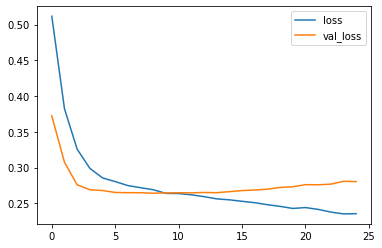

In [51]:
losses = pd.DataFrame(model.history.history)
losses.plot();

In [52]:
y_valpred = model.predict_classes(X_val)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
print(classification_report(y_val,y_valpred))

              precision    recall  f1-score   support

           0       0.92      0.45      0.60      1524
           1       0.88      0.99      0.93      6346

    accuracy                           0.89      7870
   macro avg       0.90      0.72      0.77      7870
weighted avg       0.89      0.89      0.87      7870



In [55]:
print(confusion_matrix(y_val,y_valpred))

[[ 683  841]
 [  59 6287]]


### Conclusion: 

After thorough data cleaning and pre-processing, we are able to achieve an accuracy of 90% using only 10% of the sample data. This gives us a deep learning model with decent performance